In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [102]:
# read data
df_ice_cream = pd.read_csv('https://raw.githubusercontent.com/ritvikmath/Time-Series-Analysis/master/ice_cream.csv')

In [103]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [104]:
df_ice_cream.rename(columns={'DATE': 'date', 'IPN31152N': 'production'}, inplace=True)

In [105]:
df_ice_cream['date'] = pd.to_datetime(df_ice_cream['date'])

In [106]:
df_ice_cream.set_index('date', inplace=True)

In [107]:
df_ice_cream.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
production,577.0,109.701844,27.951723,58.6598,88.5149,107.4617,127.9323,196.1737


In [108]:
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [109]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


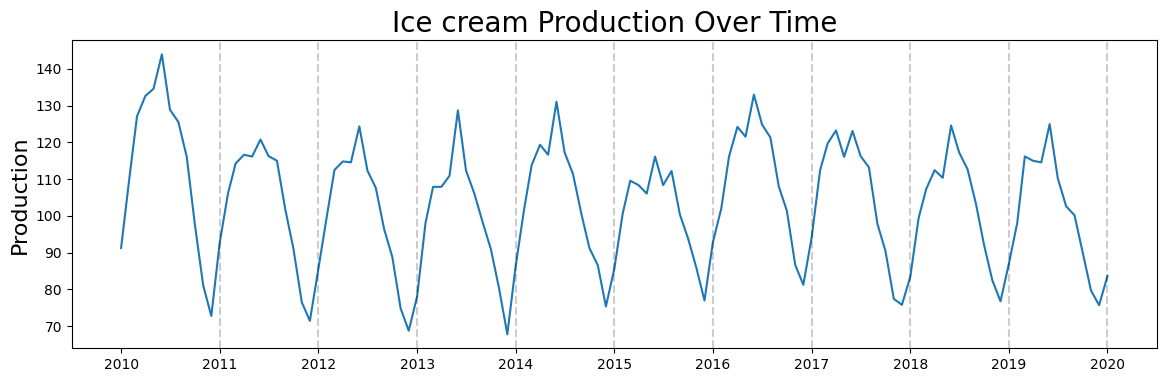

In [110]:
plt.figure(figsize=(14, 4))
plt.plot(df_ice_cream.production)
plt.title('Ice cream Production Over Time', fontsize = 20)
plt.ylabel('Production', fontsize= 16)
for year in range ( 2011,2021):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='k', linestyle='--', alpha=0.2)

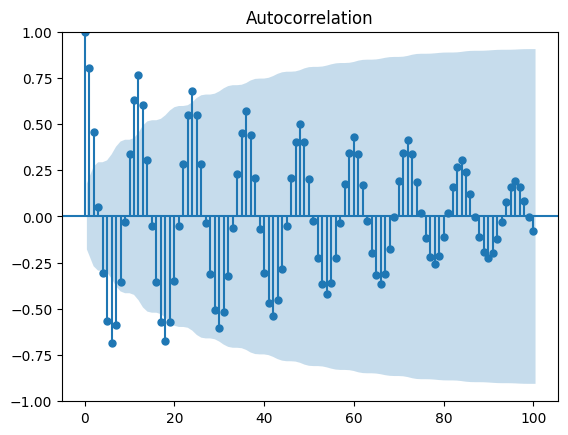

In [111]:
acf_plot = plot_acf(df_ice_cream.production, lags = 100)


the graph is on decaying ACF, we are likely dealing with an Auto regessive process

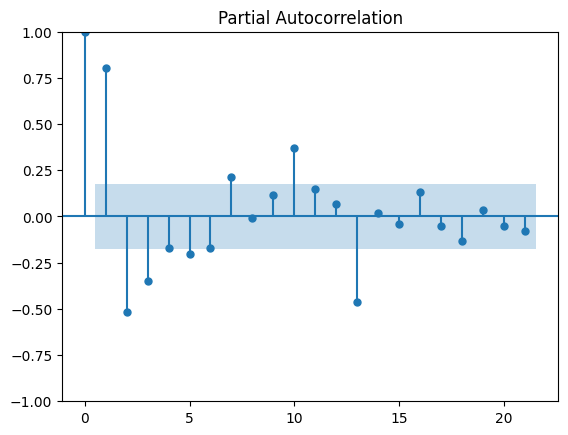

In [112]:
# PACF 
pacf_plot = plot_pacf(df_ice_cream.production)

We should start with an autoregresive model with 1,2,3,4,6,8,11

In [113]:
# on stock data 

import yfinance as yf

In [114]:
# define the ticker symbol
tickerSymbol = 'TSLA'

In [115]:
# get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [116]:
tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2024-1-1')

In [117]:
tickerDf = tickerDf[['Close']]

In [118]:
tickerDf.head()

,Close
Date,
2020-01-02 00:00:00-05:00,28.684000
2020-01-03 00:00:00-05:00,29.534000
2020-01-06 00:00:00-05:00,30.102667
2020-01-07 00:00:00-05:00,31.270666
2020-01-08 00:00:00-05:00,32.809334


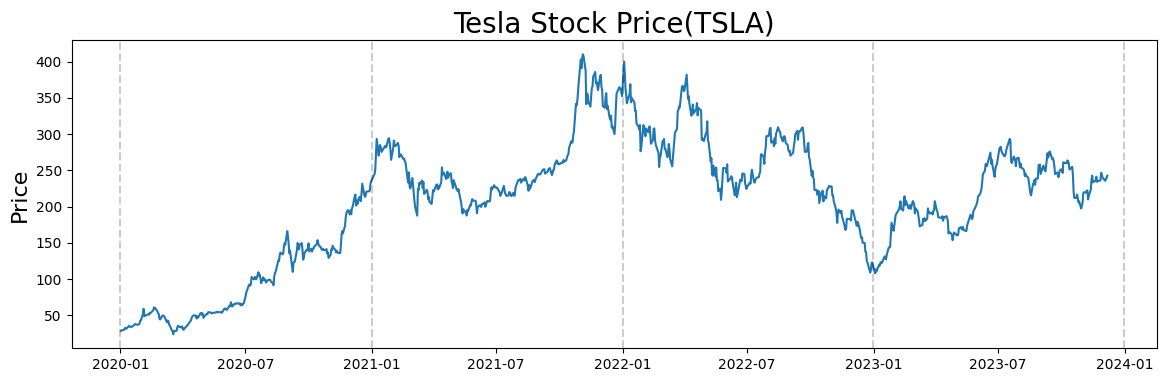

In [119]:
plt.figure(figsize=(14, 4))
plt.plot(tickerDf.Close)
plt.title('Tesla Stock Price(TSLA)', fontsize = 20)
plt.ylabel('Price', fontsize= 16)
for year in range ( 2020,2025):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

Stationarity : take first difference of this series

In [120]:
# take the first difference of the series
first_diffs = tickerDf.Close.values[1:]-tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs,[0]])

In [121]:
tickerDf['first_diff'] = first_diffs

In [122]:
tickerDf.head()

,Close,first_diff
Date,,
2020-01-02 00:00:00-05:00,28.684000,0.850000
2020-01-03 00:00:00-05:00,29.534000,0.568666
2020-01-06 00:00:00-05:00,30.102667,1.167999
2020-01-07 00:00:00-05:00,31.270666,1.538668
2020-01-08 00:00:00-05:00,32.809334,-0.720001


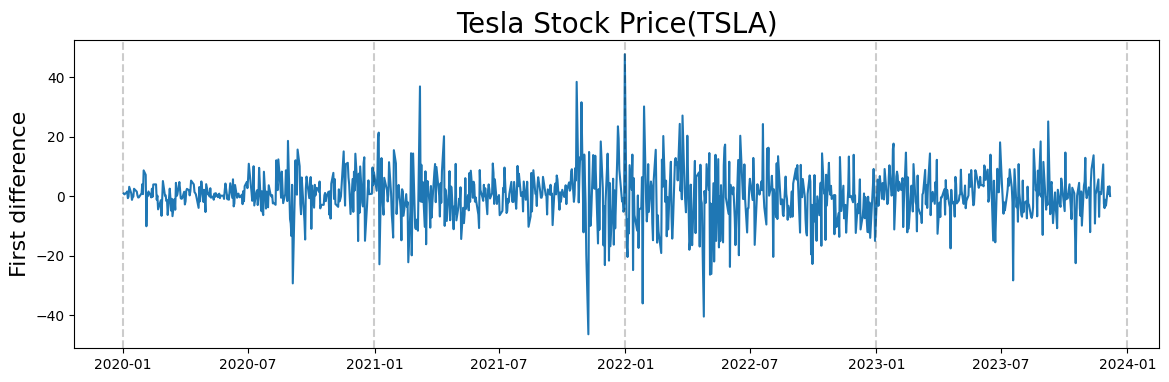

In [123]:
plt.figure(figsize=(14, 4))
plt.plot(tickerDf.first_diff)
plt.title('Tesla Stock Price(TSLA)', fontsize = 20)
plt.ylabel('First difference', fontsize= 16)
for year in range ( 2020,2025):
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='k', linestyle='--', alpha=0.2)
plt.show()

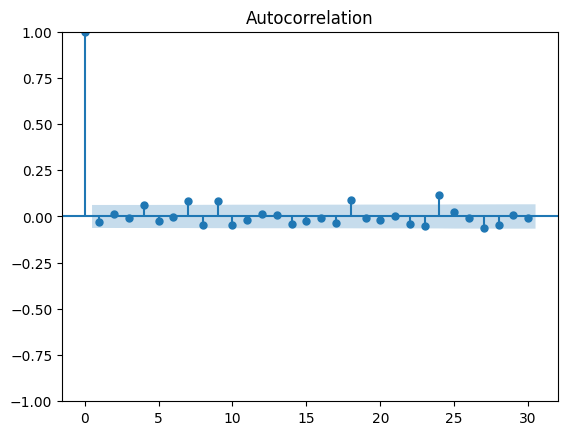

In [124]:
# ACF
acf_plot= plot_acf(tickerDf.first_diff)

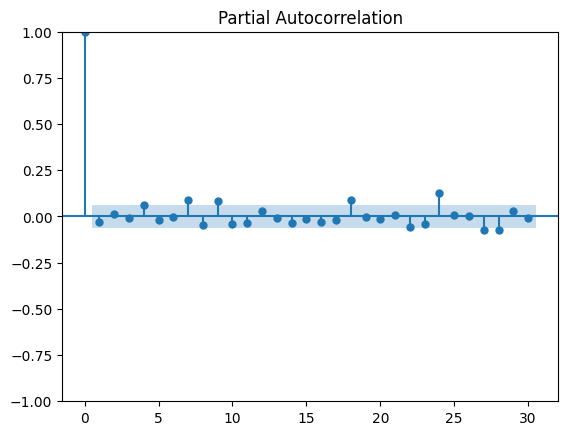

In [125]:
pacf_plot = plot_pacf(tickerDf.first_diff)

PACF also doesnt tell us much